# 🔎 Exploration and cleaning 
### Dataset: Flight Customers Activity (`Customer_Flight_Analysis.csv`) and Customer Profiles (`Customer_Loyalty_History.csv`)  

**Objective:** Analyze the data structure, identify missing values, and detect incomplete information in columns.  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Customers Flight Activity

In [2]:
pd.set_option('display.max_columns', None) 

df_flight_activity = pd.read_csv('../data/raw/Customer_Flight_Activity.csv')

df_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
df_flight_activity.shape

(405624, 10)

In [4]:
df_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
# Let's examine duplicated rows. 

duplicated = df_flight_activity[df_flight_activity.duplicated(keep=False)]

duplicated.shape

(3712, 10)

In [6]:
duplicated.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0


In [7]:
df_flight_activity.drop_duplicates(inplace=True)

In [8]:
df_flight_activity.shape

(403760, 10)

In [9]:
# Let's examine null values.

df_flight_activity.isna().sum()/df_flight_activity.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [10]:
# Checking if data make sense 

df_flight_activity[['Year', 'Month']].agg([max, min])

,Year,Month
max,2018,12
min,2017,1


In [11]:
df_flight_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [12]:
# Exploring 'Total Flights' and 'Flights Booked'

df_flight_activity[df_flight_activity['Total Flights'] < df_flight_activity['Flights Booked']].head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


In [13]:
# Exploring Points columns 

df_points = df_flight_activity[df_flight_activity['Points Redeemed'] > df_flight_activity['Points Accumulated']]

df_points.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
104777,669065,2017,10,2,2,4,1992,199.00,356,29
208193,966204,2018,4,8,2,10,2100,226.80,428,35
386424,440320,2017,7,9,9,18,1494,149.00,839,68
143988,255546,2018,2,11,3,14,2492,268.92,376,31
131310,950980,2018,11,10,3,13,3653,365.00,591,48


In [14]:
df_flight_activity['Year'].unique()

array([2017, 2018], dtype=int64)

### Customers Loyalty History

In [15]:
df_customers = pd.read_csv('../data/raw/Customer_Loyalty_History.csv')

df_customers.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [16]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [17]:
df_customers.duplicated().sum()

0

In [18]:
# Let's examine null values.

df_customers.isna().sum()/df_customers.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [19]:
df_customers[['Cancellation Year', 'Cancellation Month']]

,Cancellation Year,Cancellation Month
0,NaN,NaN
1,NaN,NaN
2,2018.0,1.0
3,NaN,NaN
4,NaN,NaN
...,...,...
16732,NaN,NaN
16733,NaN,NaN
16734,NaN,NaN
16735,NaN,NaN


In [20]:
df_customers[['Cancellation Year','Cancellation Month']] = df_customers[['Cancellation Year','Cancellation Month']].astype('Int64')

In [21]:
df_customers['Salary'].describe()

count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64

In [35]:
df_customers[df_customers['Salary'] < 0].shape

(20, 16)

In [36]:
df_customers['Salary'] = abs(df_customers['Salary']) #changes negative values to positive

In [37]:
df_customers['Salary'].describe()

count     12499.000000
mean      79359.340907
std       34749.691464
min        9081.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64

In [52]:
df_customers.groupby('Education')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


In [26]:
df_customers[df_customers['Education'] == 'College'].count() #Salary does not have data! 

Loyalty Number        4238
Country               4238
Province              4238
City                  4238
Postal Code           4238
Gender                4238
Education             4238
Salary                   0
Marital Status        4238
Loyalty Card          4238
CLV                   4238
Enrollment Type       4238
Enrollment Year       4238
Enrollment Month      4238
Cancellation Year      527
Cancellation Month     527
dtype: int64

In [27]:
df_customers[df_customers['Education'] == 'College']['Salary'].isna().sum()

4238

In [28]:
df_customers[df_customers['Education'] == 'College'].shape

(4238, 16)

In [29]:
df_customers['Salary'].isna().sum()

4238

'College' might refer to customers who started college but never completed their studies. It could be possible to impute the missing salary values using 'Bachelor' and 'High School or Below'. However, since this imputation would result in customers with the education level 'College' having the same salary, it may not be practical for future analysis.

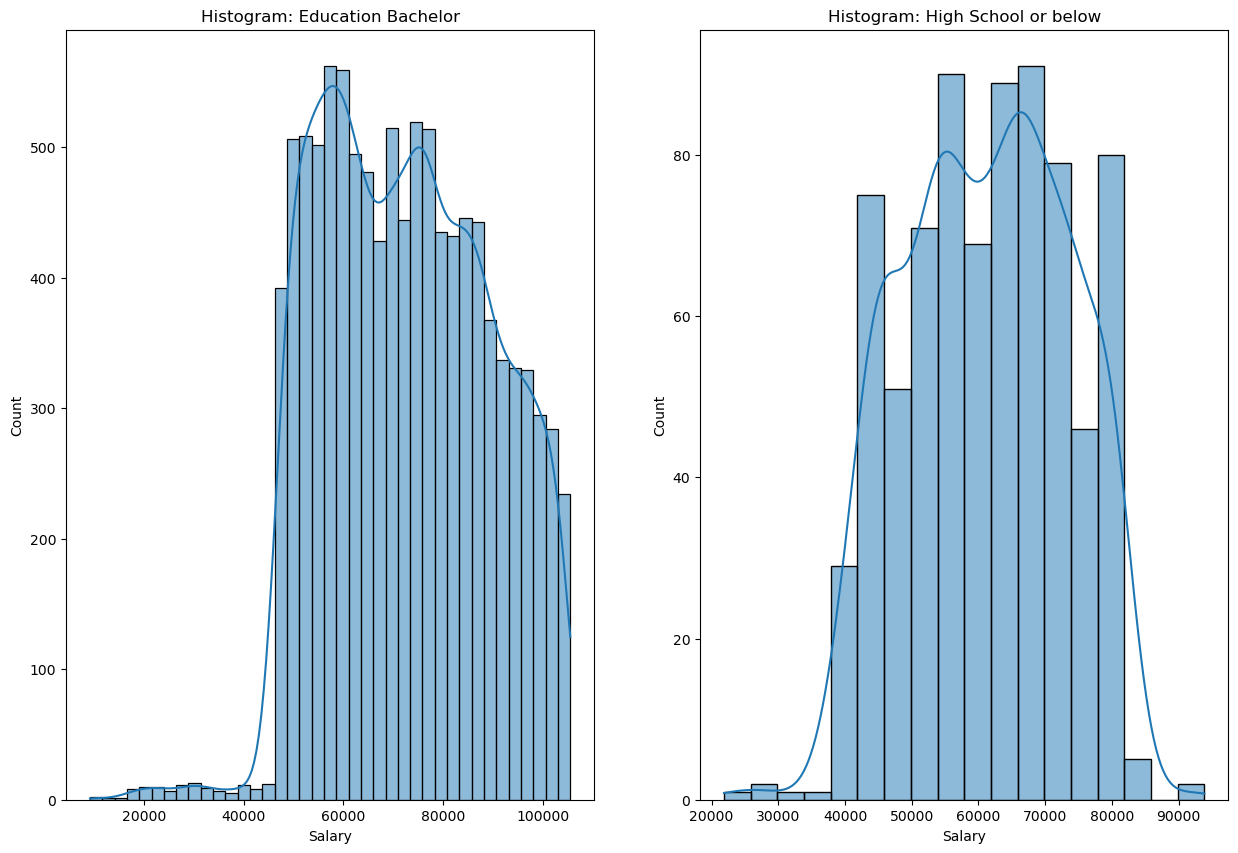

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))

sns.histplot(x = df_customers[df_customers['Education'] == 'Bachelor']['Salary'], 
             data = df_customers, 
             kde = True,
             ax=axes[0])

sns.histplot(x = df_customers[df_customers['Education'] == 'High School or Below']['Salary'], 
             data = df_customers, 
             kde = True,
             ax=axes[1])

axes[0].set_title('Histogram: Education Bachelor')
axes[1].set_title('Histogram: High School or below');

In [ ]:
# Exploring unique values: 

df_customers['Country'].unique()

In [57]:
df_customers.drop(columns='Country', inplace=True)

In [58]:
df_customers['Loyalty Card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [60]:
df_customers['Enrollment Type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [64]:
df_customers['Marital Status'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

## Data Merging

DataFrames are combined using 'Loyalty Number'. A left merge is carried out since flight activity is esential for the analysis.

In [68]:
df_loyalty_program = df_flight_activity.merge(df_customers, on='Loyalty Number', how='left')

Now, clean DataFrames are stored in .csv files. 

In [ ]:
# df_loyalty_program.to_csv('../data/processed/loyalty_program.csv')
# df_customers.to_csv('../data/processed/customers.csv')
# df_flight_activity.to_csv('../data/processed/flight_activity.csv')

#This code will create large files 